### 6.7 Lab 3: PCR and PLS Regression
#### 6.7.1 Principal Components Regression
Principal components regression (PCR) can be performed using the sklearn library. We now apply PCR to the Hitters
data, in order to predict Salary. Again, ensure that the missing values have
been removed from the data, as described in Section 6.5.


In [1]:
import pandas as pd
import numpy as np
# Load dataset
hitters = pd.read_csv('Data/Hitters.csv', index_col = 0)
hitters = hitters.dropna()
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']], drop_first=True)

hitters.drop(labels=['League', 'Division', 'NewLeague'], axis="columns", inplace=True)
hitters[['League', 'Division', 'NewLeague']] = dummies

X = hitters.drop(columns="Salary", axis = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = hitters.Salary


"Best number of componenets is {'pca__n_components': 18}"

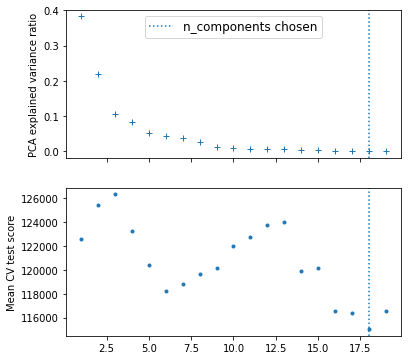

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pca = PCA()
linreg =  LinearRegression()
pcr = Pipeline(steps=[('pca', pca), ('linreg', linreg)])
grid = {'pca__n_components':range(1,20)}
search = GridSearchCV(estimator = pcr, param_grid =grid, scoring = "neg_mean_squared_error", cv = 10)
search.fit(X,Y)

display(f"Best number of componenets is {search.best_params_}")

pca.fit(X)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_+1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))
ax1.plot(np.arange(1, pca.n_components_+1),
         -search.cv_results_['mean_test_score'], '.', linewidth=2)
ax1.set_ylabel('Mean CV test score')

ax1.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')

We see that the smallest cross-validation error occurs when M = 18 components are used. This is barely fewer than M = 19, which amounts to
simply performing least squares, because when all of the components are
used in PCR no dimension reduction occurs. However, from the plot we
also see that the cross-validation error is roughly the same when only one
component is included in the model. This suggests that a model that uses
just a small number of components might suffice.

We also plotted he percentage of variance explained
in the predictors and in the response using different numbers of components. This concept is discussed in greater detail in Chapter 10. Briefly,
we can think of this as the amount of information about the predictors or
the response that is captured using M principal components. For example,
setting M = 1 only captures 38.31 % of all the variance, or information, in
the predictors. In contrast, using M = 6 increases the value to 88.63 %. If
we were to use all M = p = 19 components, this would increase to 100 %.

We now perform PCR on the training data and evaluate its test set
performance.

"On the training set, the best number of componest is {'pca__n_components': 6}"

None

'It has MSE 107592.88334013484'

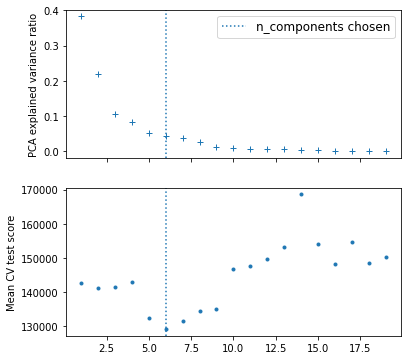

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
search.fit(X_train, y_train)
display(f"On the training set, the best number of componest is {search.best_params_}")
predictions = search.best_estimator_.predict(X_test)

pca.fit(X)
display(pca.n_components)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_+1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))
ax1.plot(np.arange(1, pca.n_components_+1),
         -search.cv_results_['mean_test_score'], '.', linewidth=2)
ax1.set_ylabel('Mean CV test score')

ax1.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')

mse = mean_squared_error(y_test, predictions)
display(f"It has MSE {mse}")



Now we find that the lowest cross-validation error occurs when M = 6.
component are used. We compute the test MSE as 107592.
This test set MSE is competitive with the results obtained using ridge regression and the lasso. However, as a result of the way PCR is implemented,
the final model is more difficult to interpret because it does not perform
any kind of variable selection or even directly produce coefficient estimates.
Finally, we fit PCR on the full data set, using M = 6, the number of
components identified by cross-validation.



In [4]:
pca = PCA(n_components = 6)
linreg =  LinearRegression()
pcr = Pipeline(steps=[('pca', pca), ('linreg', linreg)])
pcr.fit(X, Y)

Pipeline(steps=[('pca', PCA(n_components=6)), ('linreg', LinearRegression())])

### 6.7.2 Partial Least Squares
We implement partial least squares (PLS) using the the sklearn library. 

"Best number of componenets is {'n_components': 2}"

(-1.0, 19.9)

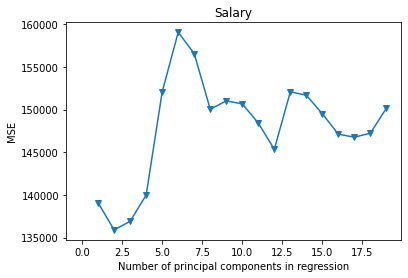

In [5]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression()
grid = {'n_components':range(1,20)}
search = GridSearchCV(estimator = pls, param_grid =grid, scoring = "neg_mean_squared_error", cv = 10)
search.fit(X_train,y_train)



display(f"Best number of componenets is {search.best_params_}")

plt.plot(np.arange(1, 20), -search.cv_results_['mean_test_score'] , '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)



The lowest cross-validation error occurs when only M = 2 partial least
squares directions are used. We now evaluate the corresponding test set
MSE.

In [6]:

predictions =search.best_estimator_.predict(X_test)
mse = mean_squared_error(predictions, y_test)
display(f"The test set MSE is {mse}")

'The test set MSE is 102583.13156134987'

The test MSE is comparable to, but slightly lower than the MSE for PCR.
Finally, we perform PLS using the full data set, using M = 2, the number
of components identified by cross-validation.

In [7]:
pls = PLSRegression(n_components = 2)
pls.fit(X,Y)
total_variance_in_x = np.sum(np.var(X, axis = 0))